In [24]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

In [25]:
# estimating CDF

def calculate_CDF(data, intervals=100):
    data.sort()
    x = np.linspace(data.min(), data.max(), intervals)
    
    result = []
    for xx in x:
        result.append(np.sum(data <= xx) / data.shape[0])
    
    return x, result

### 7. Magnitude of earthquakes near Fiji

array columns: Obs., lat, long, depth, mag, stations

In [15]:
myarray = np.loadtxt('./fijiquakes.dat')

In [18]:
magnitude = myarray[:, 4]
print(magnitude.max(), magnitude.min())

6.4 4.0


In [26]:
x, mag_cdf = calculate_CDF(magnitude, 50)

Text(0.5,1,'Estimated CDF for Earthquake Magnitude')

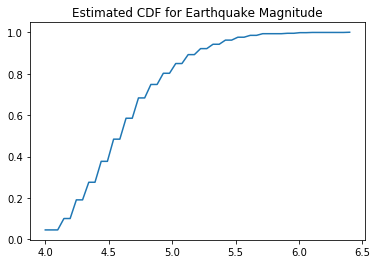

In [28]:
plt.plot(x, mag_cdf)
plt.title("Estimated CDF for Earthquake Magnitude")

**DKW Inequality**

$$
\mathbb{P} \left (\sup_x | F(x) - \hat F_n (x) | > \epsilon \right ) \leq 2 e^{-2n\epsilon^2}
$$

From this, we can construct the confidance band for $F$ as following:

Define,
$$
L(x) = \max \{ \hat F_n (x) - \epsilon_n , 0 \} \\
U(x) = \min \{ \hat F_n (x) + \epsilon_n , 1 \}
$$
where $\epsilon_n = \sqrt {\frac{1}{2n} \log {\frac{2}{\alpha}}}$.

Then, 
$$
\mathbb{P} \left( L(x) \leq F(x) \leq U(x) \text{ for all }x \right) \geq 1 - \alpha
$$

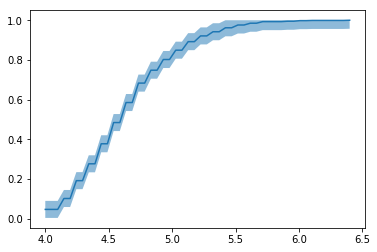

In [37]:
alpha = 0.05
n = myarray.shape[0]
episilon = np.sqrt(1/(2*n) * np.log(2/alpha))

L = [max(m-episilon, 0) for m in mag_cdf]
U = [min(m+episilon, 1) for m in mag_cdf]

plt.plot(x, mag_cdf)
plt.fill_between(x, L, U, alpha=0.5)

### 8. Eruption times and waiting times of the Old Faithful geyser

columns: observation_id, eruptions, waiting

In [41]:
data = np.loadtxt('./faithful.dat')
n = data.shape[0]
print(data.shape)

(272, 3)


Mean estimate and its standard error:
$$ 
\hat \mu = \frac{1}{n} \sum_{i=1}^n X_i = \bar X\\
\text{se}(\hat \mu) = \frac{\hat \sigma}{\sqrt{n}}
$$
where $\hat \sigma = \sqrt{\frac{1}{n} \sum_{i=1}^n (X_i - \bar X)^2} $

In [47]:
mean_wt = data[:, 2].mean()
ste_wt = np.sqrt(np.sum((data[:, 2] - mean_wt)**2)) / n

print("estimate waiting time: %.2f" % mean_wt)
print("standard error of the estimate: %.4f" % ste_wt)

estimate waiting time: 70.90
standard error of the estimate: 0.8228
